In [1]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
import yaml
import scipy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow_datasets as tfds
import tensorflow as tf
import time


In [2]:
from train import etl, chunckify, total_days, look_back, look_forward

(3785, 11)


<Figure size 432x288 with 0 Axes>

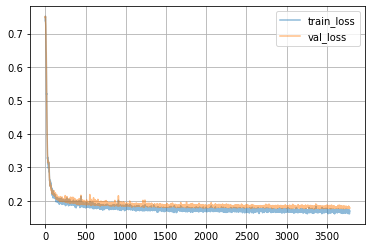

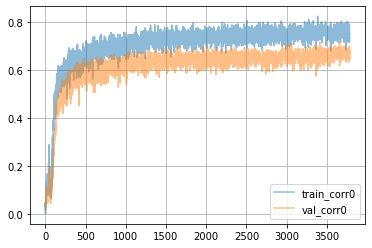

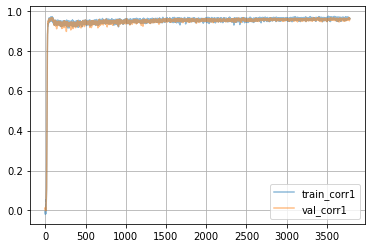

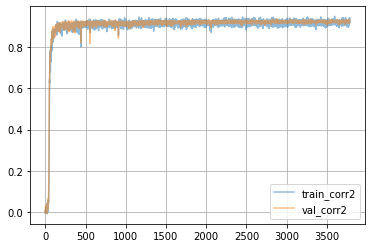

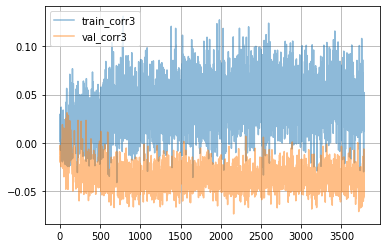

In [4]:
# check history is good prior front testing

with open('history.yml','r') as f:
    history = yaml.unsafe_load(f.read())

df = pd.DataFrame(history)
print(df.shape)
if df.shape[0]!= 0:
    plt.figure(0)
    df[['train_loss','val_loss']].plot(alpha=0.5)
    plt.grid(True)
    plt.figure(1)
    df[['train_corr0','val_corr0']].plot(alpha=0.5)
    plt.grid(True)
    plt.figure(2)
    df[['train_corr1','val_corr1']].plot(alpha=0.5)
    plt.grid(True)
    plt.figure(3)
    df[['train_corr2','val_corr2']].plot(alpha=0.5)
    plt.grid(True)
    plt.figure(4)
    df[['train_corr3','val_corr3']].plot(alpha=0.5)
    plt.grid(True)


In [5]:


input_seq_len = 80
target_seq_len = 20
batch_size = 32

num_layers = 4
d_model = 4
dff = 32
num_heads = 4
dropout_rate = 0.1


from train import Transformer


In [6]:

optimizer = tf.keras.optimizers.Adam(0.001)

transformer = Transformer(num_layers, d_model, num_heads, dff ,rate=dropout_rate,target_seq_len=target_seq_len)

########

checkpoint_path = "./checkpoints_price/train"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


In [8]:
#
# Attempting to perform BLAS operation using StreamExecutor without BLAS support [Op:MatMul]
# https://stackoverflow.com/questions/69401285/attempting-to-perform-blas-operation-using-streamexecutor-without-blas-support
#

In [9]:
batch_size = 1
X_train = tf.random.uniform((batch_size, input_seq_len, d_model), dtype=tf.float32, minval=1, maxval=1)
y_train = tf.random.uniform((batch_size, target_seq_len, d_model), dtype=tf.float32, minval=-1, maxval=1)
training = False
enc_padding_mask, look_ahead_mask, dec_padding_mask = None, None, None
predictions, attention_weights = transformer(X_train, y_train,
                                             training,
                                             enc_padding_mask,
                                             look_ahead_mask,
                                             dec_padding_mask)

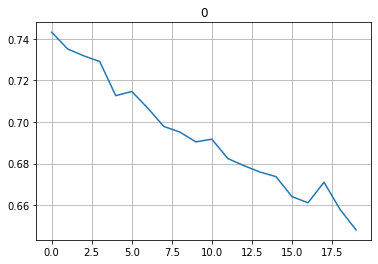

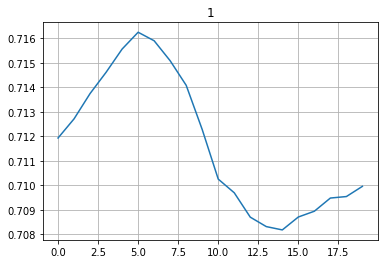

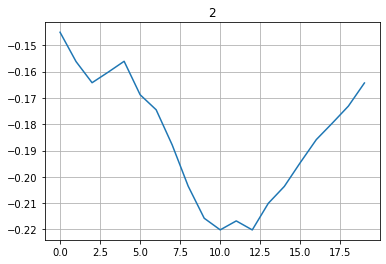

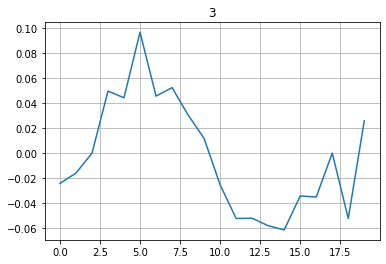

In [16]:
arr = predictions.numpy().squeeze()
for x in range(4): 
    plt.figure(x)
    plt.title(f'{x}')
    plt.plot(arr[:,x])
    plt.grid(True)